## K近邻分类器

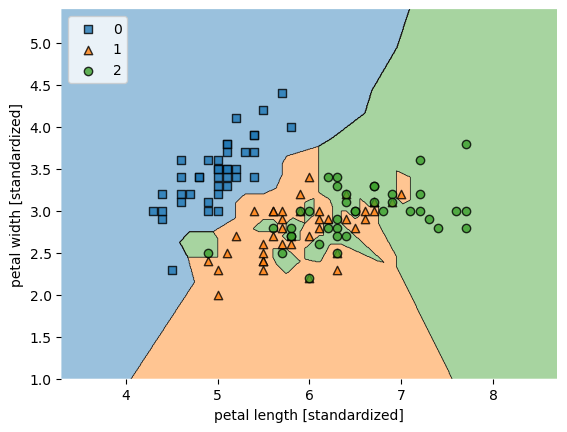

[1 0 2 1 2 0 1 2 1 2 2 0 0 0 0 2 2 1 1 1 0 1 0 1 2 1 1 2 0 0]
The Accuracy of 1NN classifier on Iris dataset is: 73.33 %


In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import numpy as np
from mlxtend.plotting import plot_decision_regions


iris = load_iris()


X = iris.data[:,:2] 
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=1, p=2, metric='minkowski')
classifier = knn.fit(X_train, y_train)
plot_decision_regions(X_train, y_train,clf=classifier)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()
pred = knn.predict(X_test)
print(pred)
Acc = np.sum(pred == y_test)/y_test.size
print('The Accuracy of 1NN classifier on Iris dataset is: %0.2f %%' %(Acc*100))

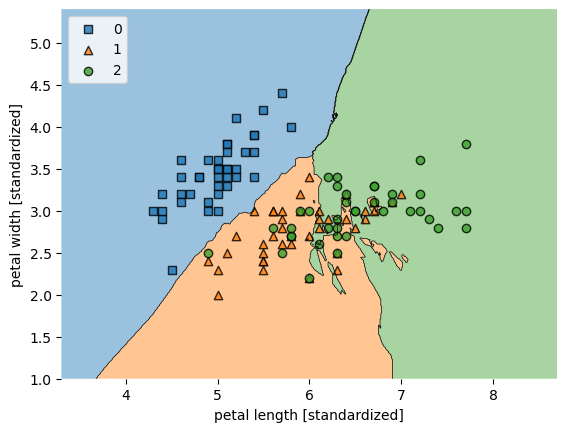

[2 0 2 1 2 0 1 2 1 1 2 0 0 0 0 2 2 1 1 1 0 1 0 1 2 1 2 2 0 0]
The Accuracy of 20NN classifier on Iris dataset is: 76.67 %


In [56]:
knn = KNeighborsClassifier(n_neighbors=20, p=2, metric='minkowski')
classifier = knn.fit(X_train, y_train)
plot_decision_regions(X_train, y_train,clf=classifier)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()
pred = knn.predict(X_test)

Acc = np.sum(pred == y_test)/y_test.size
print('The Accuracy of 20NN classifier on Iris dataset is: %0.2f %%' %(Acc*100))

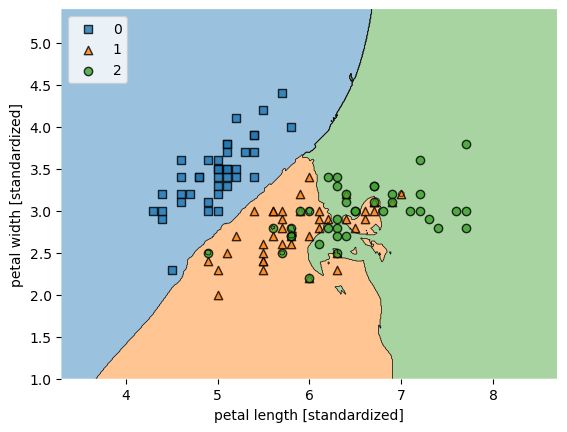

The Accuracy of 1NN classifier on Iris dataset is: 80.00 %


In [14]:
knn = KNeighborsClassifier(weights='distance',n_neighbors=20, p=2, metric='minkowski')
classifier = knn.fit(X_train, y_train)
plot_decision_regions(X_train, y_train,clf=classifier)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()
pred = knn.predict(X_test)
Acc = np.sum(pred == y_test)/y_test.size
print('The Accuracy of 20NN classifier on Iris dataset is: %0.2f %%' %(Acc*100))

# 如何自己编程实现近邻分类器



In [4]:
# X_train, X_test, y_train, y_test
print(X_train.shape)
print(X_test[0,:].reshape([2,1]).shape)
X_test[0,:].shape

(120, 2)
(2, 1)


(2,)

In [45]:
XT_train = X_train.T
Temp = X_test[0,:]

In [46]:
diff = Temp.reshape([2,1]) - XT_train
dist = np.linalg.norm(diff, axis=0)
np.argsort(dist) 

if y_train[np.argsort(dist)[0]] == y_test[0]:
    print('Correct Classified.')
else:
    print('Wrong.')

Correct Classified.


In [62]:
error = 0;
my_pred = []
for i in range(np.size(y_test)):
    Temp = X_test[i,:]
    diff = Temp.reshape([2,1]) - XT_train
    dist = np.linalg.norm(diff, axis=0)  # 按列求模
    np.argsort(dist) 
    my_pred.append(y_train[np.argsort(dist)[0]])
    if y_train[np.argsort(dist)[0]] != y_test[i]:
        error = error + 1
    diff = []
    dist = []

In [63]:
print(1 - error/np.size(y_test))

0.8


In [65]:
pred

array([1, 0, 2, 1, 2, 0, 1, 2, 1, 2, 2, 0, 0, 0, 0, 2, 2, 1, 1, 1, 0, 1,
       0, 1, 2, 1, 1, 2, 0, 0])

In [66]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [68]:
np.array(my_pred).T

array([1, 0, 2, 1, 2, 0, 1, 1, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 1,
       0, 2, 2, 1, 1, 2, 0, 0])

In [2]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  